In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("customers_.csv")

df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


(None,
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
 0  7590-VHVEG  Female              0     Yes         No       1           No   
 1  5575-GNVDE    Male              0      No         No      34          Yes   
 2  3668-QPYBK    Male              0      No         No       2          Yes   
 3  7795-CFOCW    Male              0      No         No      45           No   
 4  9237-HQITU  Female              0      No         No       2          Yes   
 
       MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
 0  No phone service             DSL             No  ...               No   
 1                No             DSL            Yes  ...              Yes   
 2                No             DSL            Yes  ...               No   
 3  No phone service             DSL            Yes  ...              Yes   
 4                No     Fiber optic             No  ...               No   
 
   TechSupport StreamingTV StreamingMovie

In [18]:
missing_values = df.isnull().sum()

missing_values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
# converting object type to numeric for EDA
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

df["TotalCharges"].isnull().sum()


11

In [20]:
df["TotalCharges"] = df["TotalCharges"].fillna(0)

df["TotalCharges"].isnull().sum()




0

In [21]:
num_summary = df.describe()

cat_summary = df.describe(include=["object"])

num_summary, cat_summary


(       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
 count    7043.000000  7043.000000     7043.000000   7043.000000
 mean        0.162147    32.371149       64.761692   2279.734304
 std         0.368612    24.559481       30.090047   2266.794470
 min         0.000000     0.000000       18.250000      0.000000
 25%         0.000000     9.000000       35.500000    398.550000
 50%         0.000000    29.000000       70.350000   1394.550000
 75%         0.000000    55.000000       89.850000   3786.600000
 max         1.000000    72.000000      118.750000   8684.800000,
         customerID gender Partner Dependents PhoneService MultipleLines  \
 count         7043   7043    7043       7043         7043          7043   
 unique        7043      2       2          2            2             3   
 top     7590-VHVEG   Male      No         No          Yes            No   
 freq             1   3555    3641       4933         6361          3390   
 
        InternetService OnlineSe

##### Data Visualization

Text(0, 0.5, 'Count')

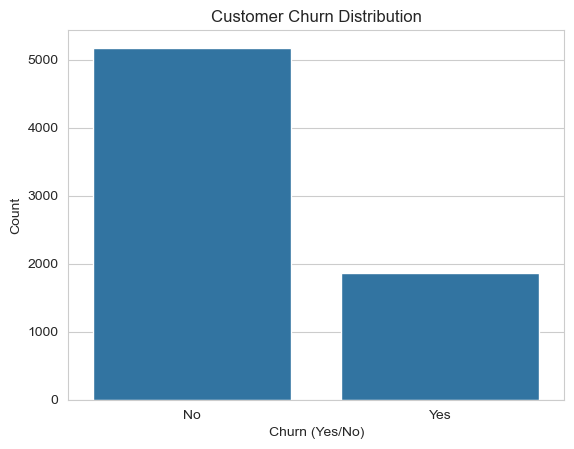

In [29]:
# for Churn distribution

sns.countplot(x="Churn", data=df)
plt.title("Customer Churn Distribution")
plt.xlabel("Churn (Yes/No)")
plt.ylabel("Count")


Text(0, 0.5, 'Count')

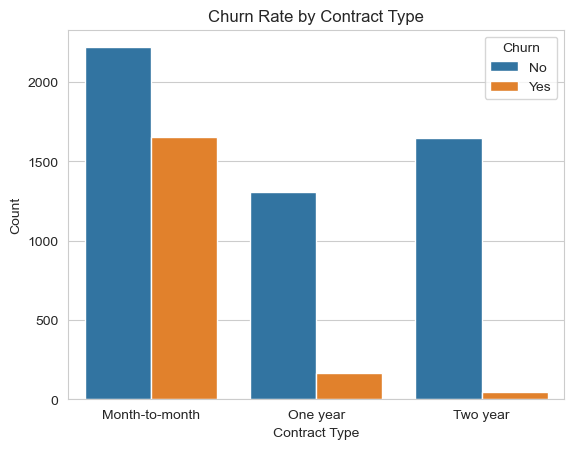

In [28]:
# for Contracts 
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")


Text(0, 0.5, 'Count')

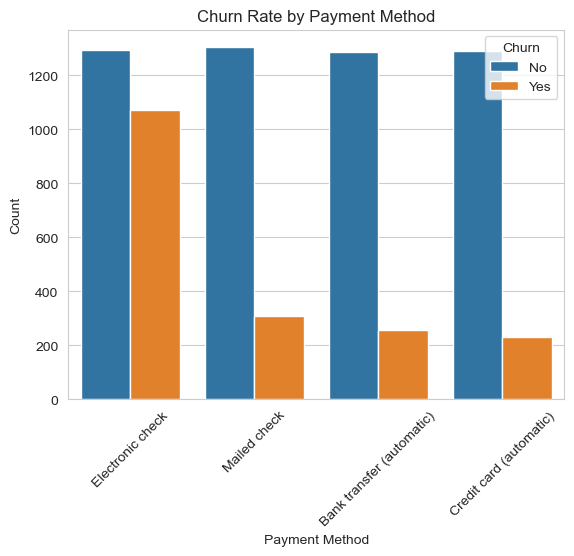

In [27]:
# across Payment Methods
sns.countplot(x="PaymentMethod", hue="Churn", data=df)
plt.xticks(rotation=45)
plt.title("Churn Rate by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")


##### Insights from EDA

OVERALL CHURN :

The majority of customers are in non-churned category.


CONTRACT TYPE AND CHURN RATE :

-> Month-to-month contract customers have the highest churn rate.

Hence, customers are not locked into long-term commitments, making it easier for them to leave.


-> Customers with one-year or two-year contracts churn less.

Longer contracts create stickiness, reducing churn.



PAYMENT METHOD AND CHURN RATE :

-> Customers using Electronic Check have the highest churn rate.

-> Customers paying via Bank Transfer and Credit Card have lower churn.

Automated payments reduce involuntary churn caused by missed payments.